In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 Viterbi

In [ ]:
n = 27
# S = range(1,28)
# O = range(0,2)
aij = np.loadtxt("transitionMatrix.txt")

In [ ]:
aij.shape

(27, 27)

In [ ]:
Ot = np.loadtxt("observations.txt",dtype = "int")

In [ ]:
Ot.shape, Ot[0]

((430000,), 0)

In [ ]:
PIi = np.loadtxt("initialStateDistribution.txt")

In [ ]:
PIi.shape, PIi[0]

((27,), 0.037037037037)

In [ ]:
bik = np.loadtxt("emissionMatrix.txt")

In [ ]:
bik.shape,bik[0]

((27, 2), array([0.96428571, 0.03571429]))

In [ ]:
lsit = np.zeros((27,len(Ot)))

### t = 1

In [ ]:
for i in range(len(lsit)):
  lsit[i][0] = np.log(PIi[i]) + np.log(bik[i][Ot[0]])
# print(lsit)

### t > 1

In [ ]:
len(lsit)

27

In [ ]:
lsit = np.zeros((27,len(Ot)))
phitj = np.zeros((27,len(Ot)))
for i in range(len(lsit)):
  lsit[i][0] = np.log(PIi[i]) + np.log(bik[i][Ot[0]])
# print(lsit)
T = len(Ot)
# T=10000
# argMaxi = [0]*T
for t in tqdm(range(1,T)):
  # tmp = np.zeros((27,1))
  for j in range(27):
    argMaxi = lsit[:,t-1] + np.log(aij[:,j])
    # print(phit1j.shape)
    maxi = np.argmax(argMaxi)
    phitj[j,t] = maxi

    ft = np.amax(argMaxi) 
    st = np.log(bik[j,Ot[t]])
    lsit[j][t] = ft+st
    
  # lsit = np.hstack((lsit,tmp))
  
  # break


    # 
    # 




  0%|          | 0/429999 [00:00<?, ?it/s]

In [ ]:
lsit.shape

(27, 10000)

In [ ]:
St = [0]*T
for i in tqdm(range(len(St)-1,-1,-1)):
  if i == T-1:
    St[i] = np.argmax(lsit[:,T-1])
  else:
    # tmpp = St[i+1]
    # tmp = phitj[i+1,St[i+1]]
    St[i] = phitj[int(St[i+1]),int(i+1)]


  0%|          | 0/430000 [00:00<?, ?it/s]

Text(0, 0.5, 'Hidden states (s_t)')

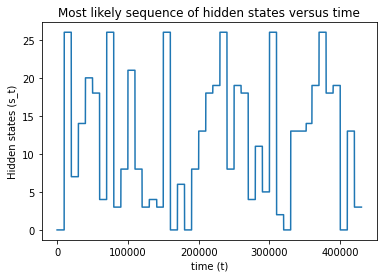

In [ ]:
plt.plot(St)
plt.title('Most likely sequence of hidden states versus time')
plt.xlabel('time (t)')
plt.ylabel('Hidden states (s_t)')

In [ ]:
st = St[0]
lmt = 0
while(True):
  lmt+=1
  if St[lmt]!=st:
    break
print(lmt)

10000


In [ ]:
dick = {}
cnt = 0
for i in range(ord("a"),ord("z")):
  dick[cnt] = chr(i)
  cnt+=1
dick[26] = " "
verify = ""
print(dick.keys())
cnt = 0
lmt = 8000
for t in range(T-1):
  if St[t] == St[t+1]:
    cnt += 1
  else: 
    cnt = 0
  if cnt > 8000:
    verify += (dick.get(St[t]))
    cnt = 0
  # if i%lmt==0:
  #   # print(i)
  #   verify+=dick[int(St[i+1])]
  #   cnt = 1
  
  

# verify+=dick[int(St[T-1])]
print(verify)
# set(verify)


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26])
a house divided against itself cannot stand
